# GROUP 19
Dataset: IMDB Spoiler Dataset

Motivation:
User reviews are one of the first places people look when deciding whether to watch a movie or TV show but these reviews often contain spoilers that unintentionally ruin our viewing experience. Those spoilers may reveal key plot twists or endings, removing the suspense and emotional impact that make storytelling enjoyable. This is a significant problem for audiences who risk having our experiences diminished, and for review platforms which risk lower user trust and engagement. By building systems to automatically detect and filter spoilers, platforms can protect users from unwanted revelations while still allowing them to benefit from genuine reviews. The outcome would benefit casual viewers, streaming platforms and content creators alike, ensuring reviews remain helpful without spoiling the narrative.

## Load and Clean Dataset

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
movie_details = []
movie_reviews = []

def load_dataset(filepath: str):
    dataset = []
    with open(filepath, "r") as f:
        for i, line in enumerate(f):
            line = line.strip()
            if line:
                data = json.loads(line)
                dataset.append(data)
    return dataset

def duration_to_minutes(duration):
    hour_match = re.search(r'(\d+)\s*h', duration)
    min_match = re.search(r'(\d+)\s*min', duration)

    hours = 0
    minutes = 0

    if hour_match:
        hours = int(hour_match.group(1))
    if min_match:
        minutes = int(min_match.group(1))
        
    return (hours * 60) + minutes

In [3]:
from ast import literal_eval
import ast
movie_details = pd.DataFrame(load_dataset("/Users/catherinekang/Documents/CS3244/project/data/IMDB_movie_details.json"))

movie_details['duration'] = movie_details['duration'].apply(duration_to_minutes)
movie_details['release_date'] = pd.to_datetime(movie_details['release_date'], errors='coerce')
movie_details['rating'] = pd.to_numeric(movie_details['rating'], errors='coerce')
movie_details['plot_synopsis'].replace("", np.nan, inplace=True)

movie_details.head()

/var/folders/f7/v2jm437d6mb5tf7w75rg98fr0000gn/T/ipykernel_39276/477172350.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_details['plot_synopsis'].replace("", np.nan, inplace=True)


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",117,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",105,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",97,"[Comedy, Romance]",6.7,2002-04-11,NaN
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",126,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,103,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [4]:
movie_reviews = pd.DataFrame(load_dataset("/Users/catherinekang/Documents/CS3244/project/data/IMDB_reviews.json"))

movie_reviews['review_date'] = pd.to_datetime(movie_reviews['review_date'], errors='coerce')
movie_reviews['is_spoiler'] = movie_reviews['is_spoiler'].astype(bool)
movie_reviews['rating'] = pd.to_numeric(movie_reviews['rating'], errors='coerce')
movie_reviews['review_id'] = np.arange(len(movie_reviews))

movie_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,review_id
0,2006-02-10,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,0
1,2000-09-06,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,1
2,2001-08-03,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,2
3,2002-09-01,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,3
4,2004-05-20,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",4


In [5]:
train_data, test_data = train_test_split(
    movie_reviews,
    test_size=0.2,
    stratify=movie_reviews['is_spoiler'], 
    random_state=42
)

## Exploratory Data Analysis

### Class Distribution
Dataset is imbalanced (422989 vs 150924)


[338391, 120739]


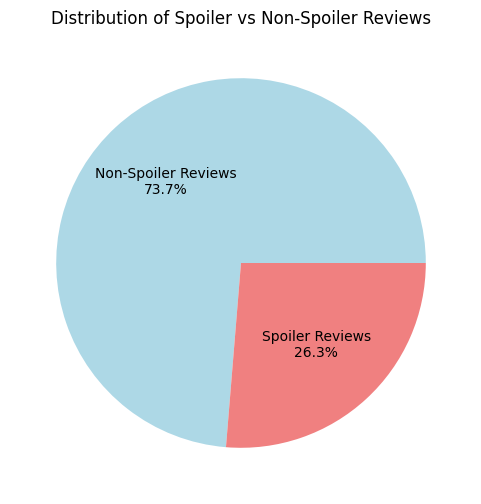

In [6]:
value = [len(train_data[train_data["is_spoiler"] == False]),len(train_data[train_data["is_spoiler"] == True])]
categories = ['Non-Spoiler Reviews', 'Spoiler Reviews']
print(value)

# plot
fig, ax = plt.subplots(figsize=(6, 6))
pie = ax.pie(value, autopct=lambda p: f'{categories[int(p < 50)]}\n{p:.1f}%', colors=['lightblue', 'lightcoral'])
ax.set_title("Distribution of Spoiler vs Non-Spoiler Reviews")
plt.show()


### Top unigram and bigram in review text with spoiler
To identify explicit spoiler keywords or spoiler phrasing patterns.

top_10_unigram: 
[['spoilers', 9986], ['spoiler', 7989], ['died', 4675], ['dies', 4089], ['kills', 3937], ['military', 3403], ['ahead', 3398], ['shoot', 3374], ['luke', 3372], ['wolverine', 3317]]

top_10_bigram:
[['spoiler alert', 1782], ['spoilers ahead', 1027], ['obi wan', 777], ['contains spoilers', 668], ['death star', 656], ['contain spoilers', 656], ['main villain', 597], ['plot device', 568], ['film ends', 544], ['time line', 542]]


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams_sklearn(text_series, n, top_k=1000):
    
    vectorizer = CountVectorizer(
        ngram_range=(n, n),
        stop_words='english'
    )
    
    X = vectorizer.fit_transform(text_series)
    
    total_counts = X.sum(axis=0)

    ngram_counts = pd.DataFrame({
        'ngram': vectorizer.get_feature_names_out(),
        'count': total_counts.flat
    })

    ngram_counts = ngram_counts.sort_values(by='count', ascending=False).head(top_k).values.tolist()
    
    return ngram_counts

spoiler_reviews = train_data[train_data['is_spoiler'] == True]['review_text'].dropna()
nonspoiler_reviews = train_data[train_data['is_spoiler'] == False]['review_text'].dropna()

top_spoiler_unigrams = get_top_ngrams_sklearn(spoiler_reviews, n=1)
top_nonspoiler_unigrams = get_top_ngrams_sklearn(nonspoiler_reviews, top_k = 10000, n=1)

top_spoiler_bigrams = get_top_ngrams_sklearn(spoiler_reviews, n=2)
top_nonspoiler_bigrams = get_top_ngrams_sklearn(nonspoiler_reviews, top_k = 10000, n=2)


# 3. Run analysis for bigrams (n=2)
# top_spoiler_bigrams = get_top_ngrams_sklearn(spoiler_reviews, n=2)
# print("\nTop 20 Spoiler Bigrams (using sklearn):\n", top_spoiler_bigrams)

In [8]:
top_10_spoiler_unigrams = []
for i in top_spoiler_unigrams:
    nonspoiler = [i[0] for i in top_nonspoiler_unigrams]
    if i[0] not in nonspoiler[:1400]:
        top_10_spoiler_unigrams.append(i)

print(top_10_spoiler_unigrams[:10])

top_10_spoiler_bigrams = []
for i in top_spoiler_bigrams:
    nonspoiler = [i[0] for i in top_nonspoiler_bigrams]
    if i[0] not in nonspoiler[:2100]:
        top_10_spoiler_bigrams.append(i)

print(top_10_spoiler_bigrams[:10])


[['spoilers', 9986], ['spoiler', 7989], ['died', 4675], ['dies', 4089], ['kills', 3937], ['military', 3403], ['ahead', 3398], ['shoot', 3374], ['luke', 3372], ['wolverine', 3317]]
[['spoiler alert', 1782], ['spoilers ahead', 1027], ['obi wan', 777], ['contains spoilers', 668], ['death star', 656], ['contain spoilers', 656], ['main villain', 597], ['plot device', 568], ['film ends', 544], ['time line', 542]]


### Review rating's impact
Review rating has little to no impact on whether a user includes spoilers. However, there is a slight pattern indicating that higher-rated reviews tend to contain fewer spoilers, though the difference is minimal.

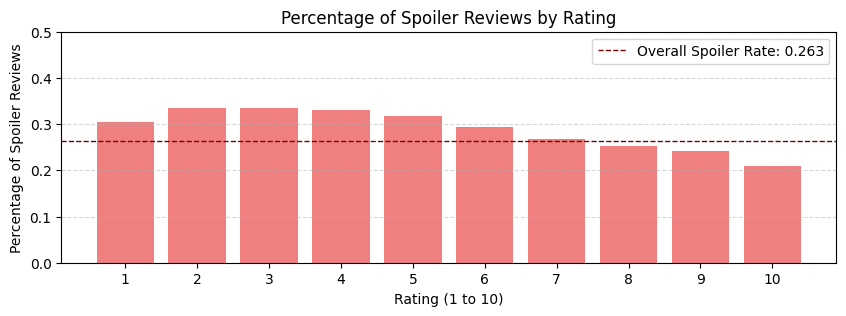

In [9]:
rating_df = train_data.groupby('rating')['is_spoiler'].value_counts().unstack(fill_value=0)
rating_df["total"] = rating_df[True]/rating_df.sum(axis=1)

rating_df = rating_df.sort_index(ascending=False)

# plot
fig, ax = plt.subplots(figsize=(10, 3))
bars = ax.bar(rating_df.index, rating_df['total'], color='lightcoral')
ax.axhline(y=0.263, color='maroon', linestyle='--', linewidth=1, label = 'Overall Spoiler Rate: 0.263')

ax.set_title("Percentage of Spoiler Reviews by Rating")
ax.set_xlabel("Rating (1 to 10)")
ax.set_ylabel("Percentage of Spoiler Reviews")
ax.set_xticks(rating_df.index)
ax.set_ylim(0, 0.5)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.legend()
plt.show()

### How Spoiler-Prone Are Users? 
We use shrinkage because it blends each user’s spoiler rate with the global average, so low-activity users don’t look extreme. This keeps the estimates stable and lets us use all users without dropping those with few reviews.

This analysis shows most users fall in the medium band (20–50%), so a single user’s history rarely proves they “always” or “never” spoil. Even so, the smoothed user rate is a useful prior: when the text signal is borderline, a higher user prior nudges the final score upward and helps catch spoilers that the text model might miss, reducing false negatives; when the user is usually safe, the prior nudges the score downward and prevents unnecessary flags. In short, history isn’t decisive on its own, but it improves decisions when combined with other features.

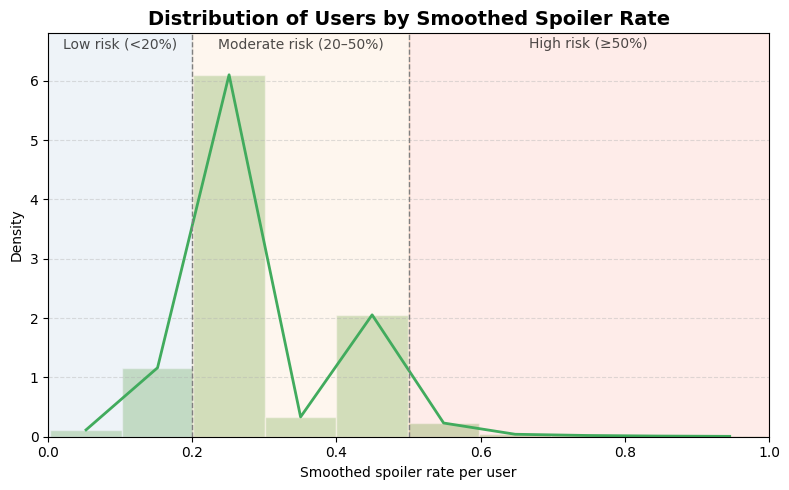

In [10]:
users_df = train_data.groupby('user_id')["is_spoiler"].value_counts().unstack().fillna(0)
users_df = users_df.reindex(columns=[False, True], fill_value=0)
users_df.columns = ['non_spoiler', 'spoiler']

users_df['total_reviews'] = users_df['non_spoiler'] + users_df['spoiler']

# shrinkage (beta smoothing)
p0 = (users_df['spoiler'].sum() / users_df['total_reviews'].sum()) # global spoiler rate p0

m = 4 
users_df['spoiler_rate_smoothed'] = (users_df['spoiler'] + m * p0) / (users_df['total_reviews'] + m)

rates = users_df['spoiler_rate_smoothed'].to_numpy()

# plot

t_low, t_high = 0.20, 0.50
fig, ax = plt.subplots(figsize=(8, 5))

counts, bin_edges, _ = ax.hist(
    rates, bins=10, density=True, color="#A5CE97", edgecolor='white', alpha=0.6,
    label='Smoothed user spoiler-rate (density)'
)

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2
ax.plot(bin_mids, counts, color='#41ab5d', linewidth=2)

ax.axvspan(0.0, t_low, color='#a6bddb', alpha=0.18)
ax.axvspan(t_low, t_high, color='#fdd0a2', alpha=0.18)
ax.axvspan(t_high, 1.0, color='#fb6a4a', alpha=0.12)
ax.axvline(t_low, color='gray', linestyle='--', linewidth=1)
ax.axvline(t_high, color='gray', linestyle='--', linewidth=1)

top = 0.955
tr = ax.get_xaxis_transform()
ax.text((0.0 + t_low)/2,  top, 'Low risk (<20%)',     ha='center', va='bottom', transform=tr, alpha=0.7)
ax.text((t_low + t_high)/2, top, 'Moderate risk (20–50%)', ha='center', va='bottom', transform=tr, alpha=0.7)
ax.text((t_high + 1.0)/2,  top, 'High risk (≥50%)',   ha='center', va='bottom', transform=tr, alpha=0.7)

ax.set_title('Distribution of Users by Smoothed Spoiler Rate', fontsize=14, fontweight='bold')
ax.set_xlabel('Smoothed spoiler rate per user')
ax.set_ylabel('Density')
ax.set_xlim(0, 1)
ax.set_ylim(0, 6.8)
ax.grid(axis='y', linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()


### Review's length Impact
The plot suggest that longer reviews are more spoiler-prone. Once reviews get past the very short range (0-999 words), spoiler likelihood sits above the overall baseline and generally increases with length. Short reviews tends to be non-spoiler because they’re brief and the dataset is skewed that way (imbalance). Long reviews show a strong spoiler tendency which is likely because they include plot summaries. However, but a few of those bins with long reviews has small number of reviews , so treat it with caution. 

Overall, we think that review length should be included as a supporting feature as it carries useful signal, especially the general “longer → riskier” trend.

/var/folders/f7/v2jm437d6mb5tf7w75rg98fr0000gn/T/ipykernel_39276/3118946749.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_len_df = review_len_df.groupby('bin_review_length')['is_spoiler'].value_counts().unstack()
/var/folders/f7/v2jm437d6mb5tf7w75rg98fr0000gn/T/ipykernel_39276/3118946749.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(review_len_df.index, rotation=45)


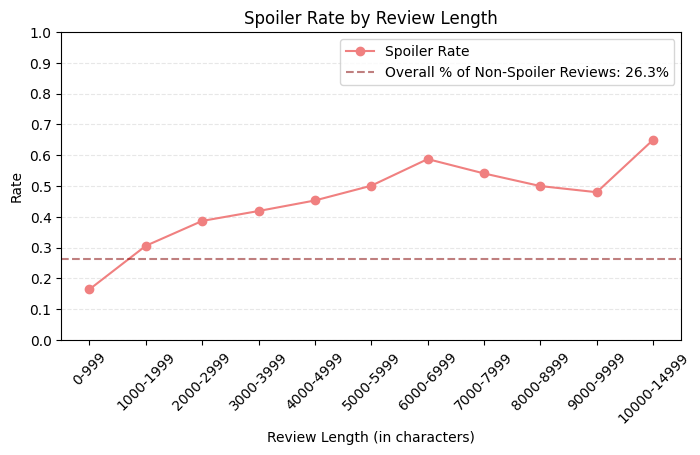

In [11]:
review_len_df = train_data[['review_text','is_spoiler']].copy()
review_len_df['review_length'] = train_data['review_text'].apply(lambda x: len(x))

review_len_df.sort_values('review_length',ascending=False).head(50)

bin_review_lengths = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000]
binned_review_lengths = pd.cut(
    review_len_df['review_length'],
    bins=bin_review_lengths,
    labels=[f"{bin_review_lengths[i]}-{bin_review_lengths[i+1]-1}" for i in range(len(bin_review_lengths)-1)],
    include_lowest=True,
    right=True
)
review_len_df["bin_review_length"] = binned_review_lengths

review_len_df = review_len_df.groupby('bin_review_length')['is_spoiler'].value_counts().unstack()

column_name = ['non_spoiler_rate', 'spoiler_rate']
review_len_df.columns = column_name

review_len_df['n_reviews'] = review_len_df['non_spoiler_rate'] + review_len_df['spoiler_rate']

review_len_df["non_spoiler_rate"] = review_len_df['non_spoiler_rate']/review_len_df['n_reviews']
review_len_df["spoiler_rate"] = review_len_df['spoiler_rate']/review_len_df['n_reviews']

# plot
fig, ax = plt.subplots(figsize=(8, 4))
line = ax.plot(review_len_df.index, review_len_df['spoiler_rate'], marker='o', color='lightcoral', label='Spoiler Rate')

ax.axhline(y = 0.263, xmin=0, xmax=20000, color='maroon', linestyle='dashed', alpha = 0.5, label='Overall % of Non-Spoiler Reviews: 26.3%')

ax.set_title("Spoiler Rate by Review Length")
ax.set_xlabel("Review Length (in characters)")
ax.set_ylabel("Rate")
ax.set_xticklabels(review_len_df.index, rotation=45)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()
plt.show()  

### Genre's Impact
Almost all genres sit within ±5 percentage points of the overall spoiler rate (shaded band), with only a few minor outliers on either side. This tight clustering indicates that genre has little standalone effect on spoiler likelihood in this dataset.

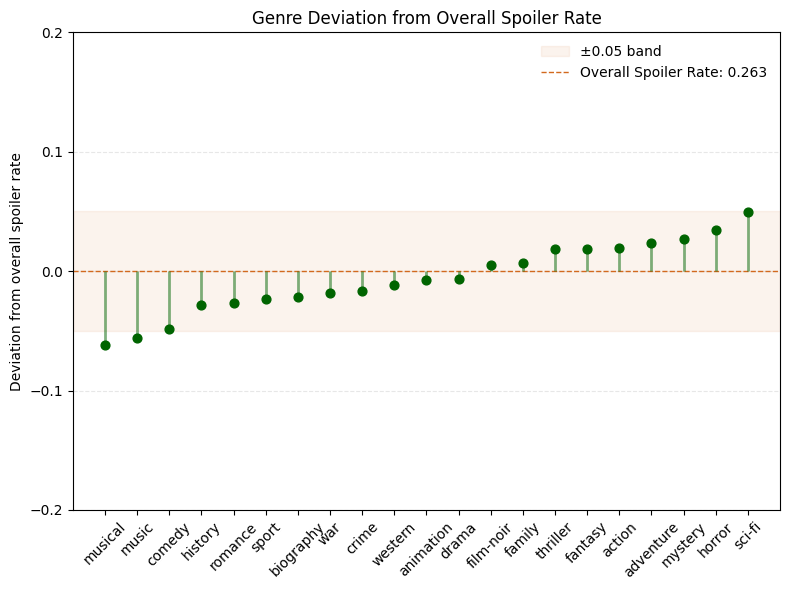

In [ ]:
md = movie_details[['movie_id', 'genre']].dropna(subset=['genre']).copy()
overall = train_data['is_spoiler'].mean()

movie_genres = (
    md.explode('genre')
      .assign(genre=lambda d: d['genre'].str.strip().str.lower())
      .drop_duplicates(['movie_id', 'genre'])
)

reviews = train_data[['review_id', 'movie_id', 'is_spoiler']].copy()

genre_df = (
    reviews.merge(movie_genres, on='movie_id', how='left')
           [['review_id', 'movie_id', 'genre', 'is_spoiler']]
)

genre_df = genre_df.groupby('genre')['is_spoiler'].value_counts().unstack().fillna(0)
column_name = ["non_spoiler", "spoiler"]
genre_df.columns = column_name
genre_df['rate'] = genre_df['spoiler'] / (genre_df['non_spoiler'] + genre_df['spoiler'])
genre_df['diff'] = genre_df['rate'] - overall  # difference from overall rate

genre_df = genre_df.sort_values(by='rate')

# plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.axhspan(-0.05, 0.05, color='chocolate', alpha=0.08, label='±0.05 band')
ax.axhline(0, color='chocolate', linestyle='--', linewidth=1, label = f'Overall Spoiler Rate: {overall:.3f}')

y = np.arange(len(genre_df))
ax.vlines(y, 0, genre_df['diff'], colors='darkgreen', alpha = 0.5, linewidth=2)
ax.scatter(y, genre_df['diff'], color = "darkgreen", s=40)

ax.set_xticks(y)
ax.set_xticklabels(genre_df.index, rotation=45)
ax.set_ylabel('Deviation from overall spoiler rate')
ax.set_title('Genre Deviation from Overall Spoiler Rate')
ax.legend(frameon=False, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)
ax.set_yticks(np.arange(-0.5, 0.6, 0.1))
ax.set_ylim([-0.2, 0.2])


plt.tight_layout()
plt.show()

### Days-Since-Release Impact
Spoiler likelihood is fairly stable across time-since-release. Each bin sits close to the overall rate (~26%), with only small movements

/var/folders/f7/v2jm437d6mb5tf7w75rg98fr0000gn/T/ipykernel_39276/2825125095.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  date_df = date_df.groupby('category')['is_spoiler'].agg(spoilers='sum', total='count')


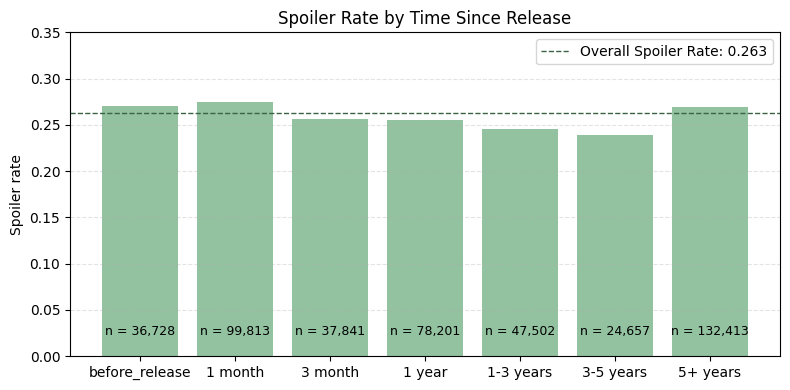

In [13]:
t = train_data[['review_date', 'movie_id', 'is_spoiler']].copy()
m = movie_details[['movie_id', 'release_date']].copy()

date_df = t.merge(m, on='movie_id', how='left')

date_df['days_since_release'] = (date_df['review_date'] - date_df['release_date']).dt.days

date_df['category'] = pd.cut(
    date_df['days_since_release'], 
    bins=[-np.inf, 0, 30, 90, 365, 365*3, 365*5, np.inf],
    labels=['before_release', '1 month', '3 month', '1 year', '1-3 years', '3-5 years', '5+ years'],
)

date_df = date_df.dropna(subset=['release_date'])

overall = date_df['is_spoiler'].mean()

date_df = date_df.groupby('category')['is_spoiler'].agg(spoilers='sum', total='count')
date_df['rate'] = date_df['spoilers'] / date_df['total']

# plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(date_df.index, date_df['rate'], color="#93c2a0", edgecolor='none')
ax.axhline(y=overall, color="#3a6245", linestyle='--', linewidth=1, label = f'Overall Spoiler Rate: {overall:.3f}')

ax.set_title('Spoiler Rate by Time Since Release')
ax.set_ylabel('Spoiler rate')
ax.set_ylim(0, 0.35)
ax.grid(axis='y', ls='--', alpha=0.35)
for i, n in enumerate(date_df['total']):
    ax.text(i, 0.02, f'n = {n:,}', ha='center', va='bottom', fontsize=9, rotation=0)

ax.legend()

plt.tight_layout()
plt.show()



# IGNORE

### User Review Frequency 

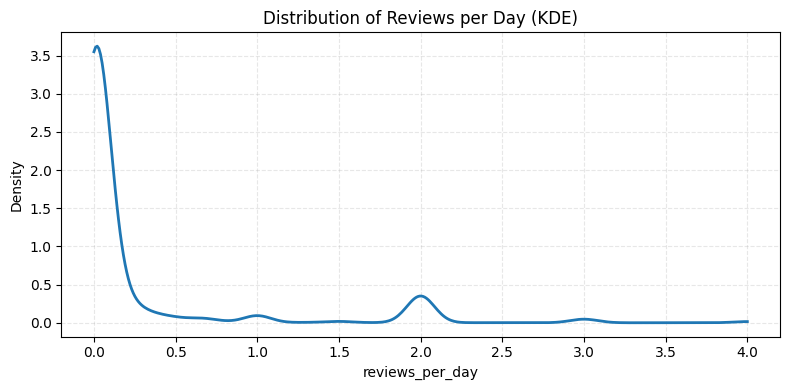

In [14]:
freq_df = train_data[['user_id', 'review_date', 'is_spoiler']].copy()
freq_df = freq_df.groupby('user_id')['review_date'].agg(first='min', last='max', count='count').reset_index()

freq_df['days_active'] = (freq_df['last'] - freq_df['first']).dt.days + 1
freq_df['days_active'] = freq_df['days_active'].clip(lower=1)

# 3) Mark users who only left one review
freq_df['single_review'] = freq_df['count'].eq(1)

# 4) Review frequency (compute only for users with >=2 reviews)
freq_df['reviews_per_day'] = np.where(
    freq_df['count'] > 1,
    freq_df['count'] / freq_df['days_active'],
    np.nan
)

x = freq_df['reviews_per_day'].dropna().to_numpy()

from scipy.stats import gaussian_kde
kde = gaussian_kde(x, bw_method='scott')   # try 'silverman' or a float like 0.3 for smoother
xs = np.linspace(0, np.percentile(x, 99.5), 400)  # trim extreme tail for readability
ys = kde(xs)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xs, ys, linewidth=2)
ax.set_title('Distribution of Reviews per Day (KDE)')
ax.set_xlabel('reviews_per_day')
ax.set_ylabel('Density')
ax.grid(axis='both', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
# plot
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.hist(
#     freq_df.loc[freq_df['reviews_per_day'].notna(), 'reviews_per_day'],
#     bins=30,
#     color="#93c2a0",
#     edgecolor='none'
# )
# ax.set_title('Distribution of User Review Frequency')
# ax.set_xlabel('Reviews per day (for users with ≥2 reviews)')
# ax.set_ylabel('Number of users')
# ax.set_xlim(0, 0.5)
# ax.grid(axis='y', ls='--', alpha=0.35)
# plt.tight_layout()
# plt.show()  

In [15]:
user_credibility = movie_reviews.groupby('movie_id')["is_spoiler"].value_counts().unstack().fillna(0)
user_credibility['total'] = user_credibility.sum(axis=1)
user_credibility['spoiler_percentage'] = user_credibility[True]/user_credibility['total']
user_credibility = user_credibility[user_credibility['total']>=10].sort_values(by=['spoiler_percentage', 'total'], ascending=False)
user_credibility

is_spoiler,False,True,total,spoiler_percentage
movie_id,,,,
tt2488496,257.0,482.0,739.0,0.652233
tt0118928,99.0,123.0,222.0,0.554054
tt1300854,329.0,390.0,719.0,0.542420
tt1446714,339.0,400.0,739.0,0.541272
tt1037705,269.0,283.0,552.0,0.512681
...,...,...,...,...
tt0139239,268.0,16.0,284.0,0.056338
tt0113442,17.0,1.0,18.0,0.055556
tt0247745,231.0,13.0,244.0,0.053279


In [16]:
users = movie_reviews.groupby('user_id')["is_spoiler"].value_counts().unstack().fillna(0)
users['total_reviews'] = users.sum(axis=1)
users['spoiler_percentage'] = users[True]/users['total_reviews']

# filtering users with at least 5 reviews to show more credible statistics
print(f"We are throwing away {len(users)-len(users[users['total_reviews']>=5])} users by filtering users with at least 5 reviews.")
users = users[users['total_reviews']>=5].sort_values(by=['spoiler_percentage', 'total_reviews'], ascending=False)

# group the user to bins and count the number of users in each bin
bin_labels = ['Low (<15%)', 'Medium (15–40%)', 'High (≥40%)']
bins = [0.0, 0.15, 0.40, 1.0000001]  # epsilon to include 1.0 in last bin

users['spoiler_bin'] = pd.cut(
    users['spoiler_percentage'],
    bins=bins,
    labels=bin_labels,
    include_lowest=True,
    right=True
)

spoiler_rate_bins = users['spoiler_bin'].value_counts().reindex(bin_labels, fill_value=0)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(spoiler_rate_bins.index, spoiler_rate_bins.values, color='lightgreen')

ax.set_title('Distribution of Users by Spoiler Percentage', fontsize=16)
fig.suptitle("Each user’s spoiler rate = (# spoiler reviews / # total reviews). Bars show user counts per percentage bin.",
             fontsize=10, y=0.98)

ax.set_xlabel('Spoiler Percentage Bins', fontsize=12)
ax.set_ylabel('Number of Users', fontsize=12)
ax.set_xticklabels(spoiler_rate_bins.index, rotation=0)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# bar labels
for rect in bars:
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h, f'{int(h):,}', ha='center', va='bottom', fontsize=10)

fig.tight_layout()
plt.show()users = movie_reviews.groupby('user_id')["is_spoiler"].value_counts().unstack().fillna(0)
users['total_reviews'] = users.sum(axis=1)
users['spoiler_percentage'] = users[True]/users['total_reviews']

# filtering users with at least 5 reviews to show more credible statistics
print(f"We are throwing away {len(users)-len(users[users['total_reviews']>=5])} users by filtering users with at least 5 reviews.")
users = users[users['total_reviews']>=5].sort_values(by=['spoiler_percentage', 'total_reviews'], ascending=False)

# group the user to bins and count the number of users in each bin
bin_labels = ['Low (<15%)', 'Medium (15–40%)', 'High (≥40%)']
bins = [0.0, 0.15, 0.40, 1.0000001]  # epsilon to include 1.0 in last bin

users['spoiler_bin'] = pd.cut(
    users['spoiler_percentage'],
    bins=bins,
    labels=bin_labels,
    include_lowest=True,
    right=True
)

spoiler_rate_bins = users['spoiler_bin'].value_counts().reindex(bin_labels, fill_value=0)

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(spoiler_rate_bins.index, spoiler_rate_bins.values, color='lightgreen')

ax.set_title('Distribution of Users by Spoiler Percentage', fontsize=16)
fig.suptitle("Each user’s spoiler rate = (# spoiler reviews / # total reviews). Bars show user counts per percentage bin.",
             fontsize=10, y=0.98)

ax.set_xlabel('Spoiler Percentage Bins', fontsize=12)
ax.set_ylabel('Number of Users', fontsize=12)
ax.set_xticklabels(spoiler_rate_bins.index, rotation=0)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# bar labels
for rect in bars:
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h, f'{int(h):,}', ha='center', va='bottom', fontsize=10)

fig.tight_layout()
plt.show()

SyntaxError: invalid syntax (3122310852.py, line 42)